In [56]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings

# to disable warnings
warnings.filterwarnings('ignore')

# Multiple Linear Regression

## Step 1: Reading, Understanding and Visualizing data

In [57]:
# reading the data
daily_bike_demands = pd.read_csv('day.csv')
daily_bike_demands.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [58]:
daily_bike_demands.shape

(730, 16)

In [59]:
# Dropping casual and registered as they are not significant to the analysis
daily_bike_demands = daily_bike_demands.drop(['casual', 'registered'], axis=1)
daily_bike_demands.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [60]:
print('Shape: ',  daily_bike_demands.shape)

Shape:  (730, 14)


In [61]:
print('Info: ')
daily_bike_demands.info()

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


In [62]:
#check for null values

daily_bike_demands.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### It can be observed that there are no null values in the data set

In [63]:
# check if there are any columns with all unique values/ high number of unique values
daily_bike_demands.instant.value_counts()

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64

In [64]:
daily_bike_demands.dteday.value_counts()

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64

### It is observed that both instant and dtedate have a high number of unique values 

In [65]:
# drop variables with high number of unique values as these variables will not help in analysis
daily_bike_demands = daily_bike_demands.drop(['instant', 'dteday'], axis=1)
daily_bike_demands.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [66]:
daily_bike_demands.shape

(730, 12)

In [67]:
print('Summary of dataset:')
daily_bike_demands.describe()

Summary of dataset:


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### From the data dictionary it can be found that 

The numerical variables are:
1. temp: temperature in celsius
2. atemp: feeling temperature in 
3. hum: humidity 
4. windspeed: wind speed
5. cnt: count of total rental bikes including both casual and registered
   
The categorical variables are:
1. season: season (1:spring, 2:summer, 3:fall, 4:winter)
2. yr: year
3. mnth : month ( 1 to 12)
4. holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
5. weekday : day of the week
6. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
7. weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


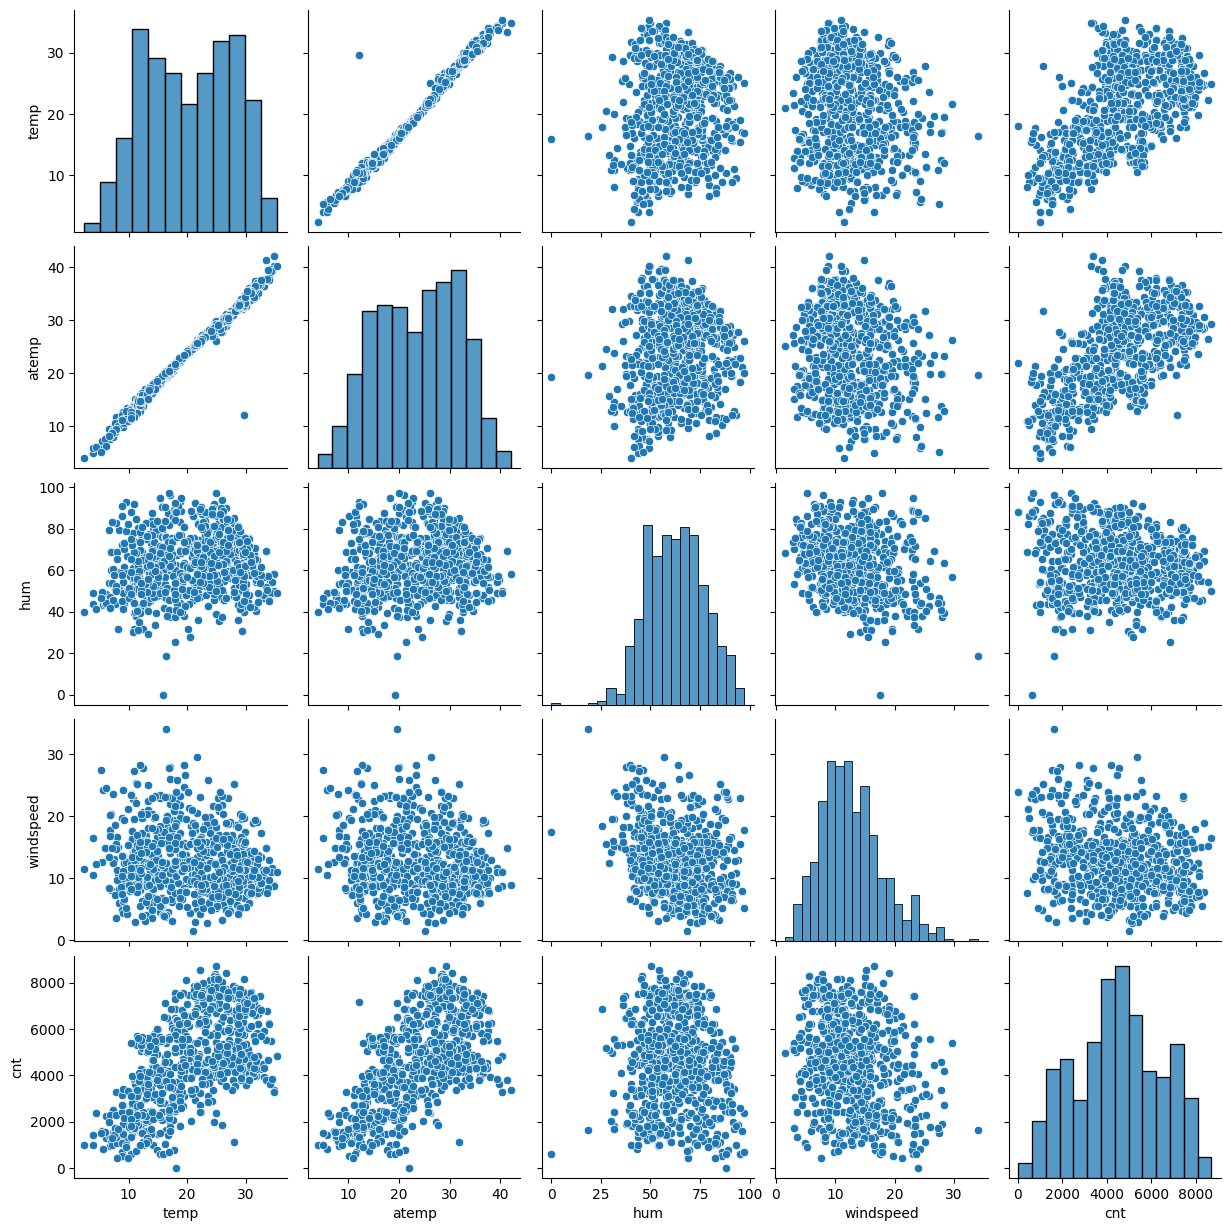

In [68]:
# create list of numerical variables 
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# visualizing the relation between the numerical variables of the data set
sns.pairplot(daily_bike_demands, vars=num_var)
plt.show()


### Observations:
From the above graphs it can be seen that there is some relation between the temp, atemp, windspeed and hum columns with the cnt column. And there appears to be a linear relation between temp, atemp and cnt columns, hence we can proceed with linear regression

In [69]:
daily_bike_demands['weathersit'].value_counts()
# weathersit has only 3 values snow+fog is not an entry in the data table

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [70]:
# map the categorical variables numeric values with their meaning so that it is easy to analyse
daily_bike_demands['season'] = daily_bike_demands.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
daily_bike_demands['mnth'] = daily_bike_demands.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
daily_bike_demands['holiday'] = daily_bike_demands.holiday.map({0:'Not a public holiday',1:'Public Holiday'})
# by checking the dteday column (visually) and checking the weekday the mapping is as follows
daily_bike_demands['weekday'] = daily_bike_demands.weekday.map({0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})
daily_bike_demands['workingday'] = daily_bike_demands.workingday.map({0:'holiday',1:'Working day'})
daily_bike_demands['weathersit'] = daily_bike_demands.weathersit.map({1: 'Clear', 2:'Mist + Cloudy', 3:'Light Snow'})
daily_bike_demands['yr'] = daily_bike_demands.yr.map({0:'2018',1:'2019'})

daily_bike_demands.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Not a public holiday,Mon,holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Not a public holiday,Tue,holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Not a public holiday,Wed,Working day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Not a public holiday,Thu,Working day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Not a public holiday,Fri,Working day,Clear,9.305237,11.46350,43.6957,12.522300,1600


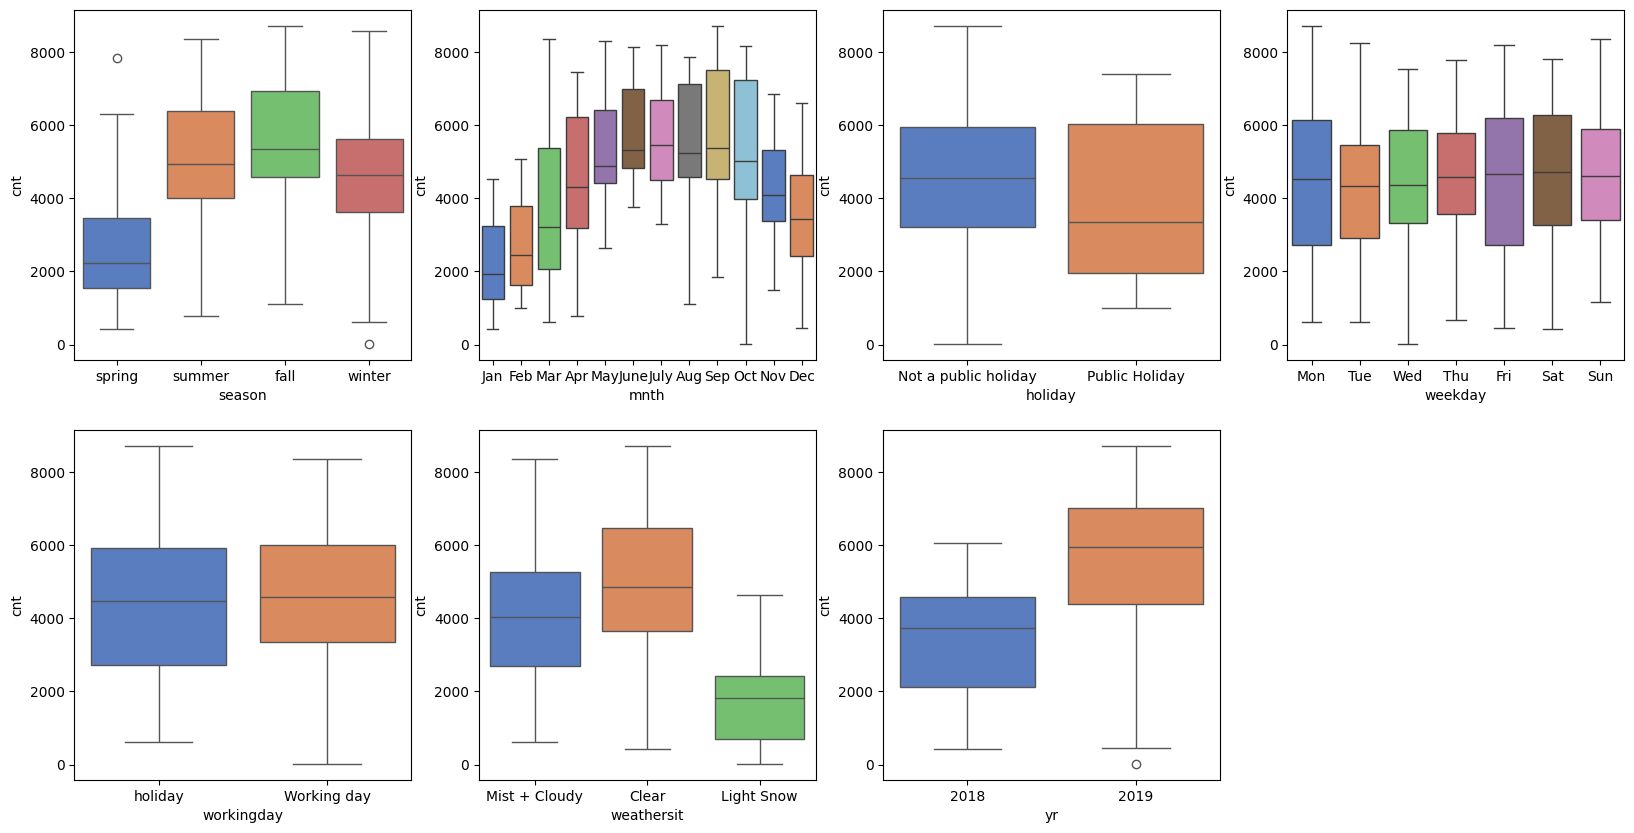

In [71]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=daily_bike_demands, palette='muted')
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=daily_bike_demands, palette='muted')
plt.subplot(2, 4, 3)
sns.boxplot(x='holiday', y='cnt', data=daily_bike_demands, palette='muted')
plt.subplot(2, 4, 4)
sns.boxplot(x='weekday', y='cnt', data=daily_bike_demands, palette='muted')
plt.subplot(2, 4, 5)
sns.boxplot(x='workingday', y='cnt', data=daily_bike_demands, palette='muted')
plt.subplot(2, 4, 6)
sns.boxplot(x='weathersit', y='cnt', data=daily_bike_demands, palette='muted')
plt.subplot(2, 4, 7)
sns.boxplot(x='yr', y='cnt', data=daily_bike_demands, palette='muted')
plt.show()

### Observations from the above plots:
1. People are most likely to rent bikes in fall, with summer next highest
2. The number of people renting bikes in the months of June, July, August and September is high
3. The number of bikes rented is higher on non-public holidays (i.e. excluding weekends)
4. The day of the week does not make a difference in the number of bikes being rented
5. Working or non working day does not impact the number of bikes being rented
6. People are least likely to rent bikes when the weather is snowy. Clear weather has the highest number of bikes rented.
7. There is a increase in the usage of rental bikes from the year 2018 to 2019.

## Step 2: Preparing the data for modelling 

### Converting the categorical variables with only 2 levels to 1,0 values

In [72]:
# convert yes/no columns to 1's and 0's
daily_bike_demands['holiday'] = daily_bike_demands.holiday.map({'Not a public holiday':0,'Public Holiday' :1})
daily_bike_demands['workingday'] = daily_bike_demands.workingday.map({'holiday':0,'Working day' :1})
daily_bike_demands['yr'] = daily_bike_demands.yr.map({'2018':0,'2019' :1})
daily_bike_demands.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating dummy variables for categorical variable with more than 2 levels

In [73]:
# drop first used as we need only m-1 variables to represent m levels
season = pd.get_dummies(daily_bike_demands['season'], dtype=int, drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [74]:
weathersit = pd.get_dummies(daily_bike_demands['weathersit'], dtype=int, drop_first=True)
weathersit

,Light Snow,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [75]:
weekday = pd.get_dummies(daily_bike_demands['weekday'], dtype=int, drop_first=True)
weekday

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,1,0,0,0,0
726,0,0,1,0,0,0
727,1,0,0,0,0,0
728,0,0,0,0,1,0


In [76]:
month = pd.get_dummies(daily_bike_demands['mnth'], dtype=int, drop_first=True)
month

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [77]:
# concat dummy dataframe with original
daily_bike_demands = daily_bike_demands.drop(['mnth', 'weekday', 'weathersit', 'season'], axis =1)
daily_bike_demands = pd.concat([daily_bike_demands, season, month, weathersit, weekday], axis =1)
daily_bike_demands.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### Split the data into training set and testing set

In [78]:
df_train, df_test = train_test_split(daily_bike_demands, train_size=0.7, random_state=100)
print('df_train shape: ', df_train.shape)
print('df_test shape: ', df_test.shape)

df_train shape:  (510, 30)
df_test shape:  (220, 30)


### Rescaling

In [79]:
# Rescaling the data using MinMax scaling
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,1,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,1,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,...,0,0,0,1,1,0,0,0,0,0
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0.236424,0,1,...,0,0,0,1,0,0,0,0,0,1


## Step 3: Training the model

### Visualize the relation between the data points

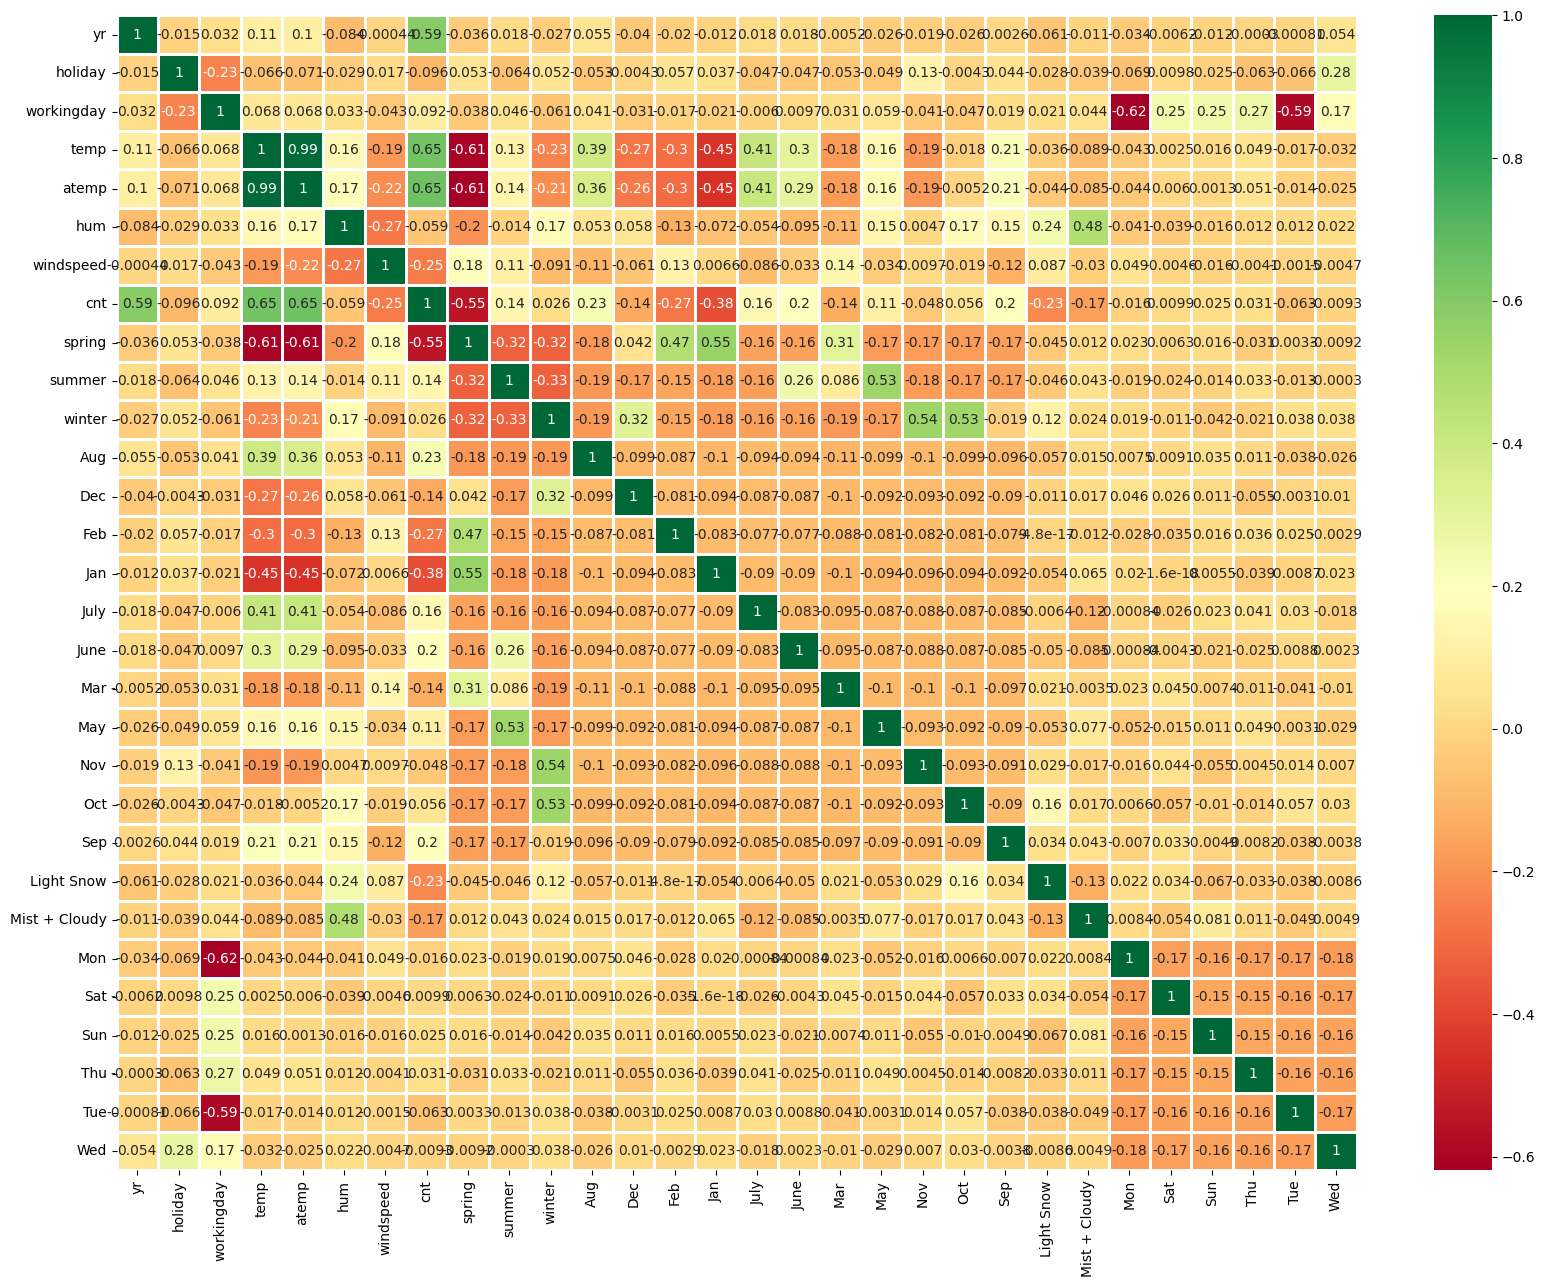

In [80]:
# heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

### Split the X variables and the Y Variable
cnt is the target variable

In [81]:
# X_train, Y_train
Y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,1,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,1,0,0,1,0,0,0


### First Model with all variables

In [82]:
# Build first model with all variables
x_train_sm = sm.add_constant(X_train)

# create first model
lr= sm.OLS(Y_train, x_train_sm)

# fit
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

const            0.240939
yr               0.232539
holiday          0.007354
workingday       0.092734
temp             0.387984
atemp            0.059045
hum             -0.152016
windspeed       -0.183604
spring          -0.045355
summer           0.042369
winter           0.107081
Aug              0.022270
Dec             -0.044274
Feb             -0.032316
Jan             -0.063064
July            -0.032657
June             0.006012
Mar              0.001555
May              0.025541
Nov             -0.039818
Oct              0.007713
Sep              0.086761
Light Snow      -0.254975
Mist + Cloudy   -0.059521
Mon              0.097535
Sat             -0.003833
Sun              0.005897
Thu             -0.012542
Tue              0.043316
Wed             -0.015727
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-

### Second Model

### Use RFE to select the features in an automated way

In [83]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

# be more lenient in initial feature selection
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, Y_train)

In [84]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(8)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.True_, np.int64(1)),
 ('winter', np.True_, np.int64(1)),
 ('Aug', np.False_, np.int64(7)),
 ('Dec', np.False_, np.int64(4)),
 ('Feb', np.False_, np.int64(5)),
 ('Jan', np.False_, np.int64(2)),
 ('July', np.True_, np.int64(1)),
 ('June', np.False_, np.int64(12)),
 ('Mar', np.False_, np.int64(15)),
 ('May', np.False_, np.int64(6)),
 ('Nov', np.False_, np.int64(3)),
 ('Oct', np.False_, np.int64(10)),
 ('Sep', np.True_, np.int64(1)),
 ('Light Snow', np.True_, np.int64(1)),
 ('Mist + Cloudy', np.True_, np.int64(1)),
 ('Mon', np.True_, np.int64(1)),
 ('Sat', np.False_, np.int64(14)),
 ('Sun', np.False_, np.int64(11)),
 ('Thu', np.False_, np.int64(13)),
 ('Tue', np.True_, np.int64(1)),
 ('Wed', n

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'Sep', 'Light Snow', 'Mist + Cloudy', 'Mon',
       'Tue'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sat', 'Sun', 'Thu', 'Wed'],
      dtype='object')

In [87]:
X = X_train[col]
X

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,July,Sep,Light Snow,Mist + Cloudy,Mon,Tue
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,1,0
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,1,0,0


In [88]:
x_train_sm = sm.add_constant(X)

# create first model
lr= sm.OLS(Y_train, x_train_sm)

# fit
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

const            0.199526
yr               0.229763
holiday         -0.018447
workingday       0.083669
temp             0.527708
hum             -0.161086
windspeed       -0.180875
spring          -0.055546
summer           0.053733
winter           0.099214
July            -0.054616
Sep              0.081983
Light Snow      -0.245009
Mist + Cloudy   -0.056344
Mon              0.093668
Tue              0.040636
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        17:40:39   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:   

### Third Model

### Calculate the VIF's to further improve the model

In [89]:
vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,50.68
13,Mon,12.20
14,Tue,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,hum,1.91
12,Mist + Cloudy,1.57


In [90]:
# workingday, Mon, Tue, spring have very high VIF
# 'holiday has a high P value of 0.386
# drop holday first as it has high p value and recalculate VIF
X = X.drop('holiday', axis =1)
X.head()

,yr,workingday,temp,hum,windspeed,spring,summer,winter,July,Sep,Light Snow,Mist + Cloudy,Mon,Tue
576,1,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
111,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,1,0,0


In [91]:
x_train_sm = sm.add_constant(X)

# create first model
lr= sm.OLS(Y_train, x_train_sm)

# fit
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

const            0.181079
yr               0.229763
workingday       0.102116
temp             0.527708
hum             -0.161086
windspeed       -0.180875
spring          -0.055546
summer           0.053733
winter           0.099214
July            -0.054616
Sep              0.081983
Light Snow      -0.245009
Mist + Cloudy   -0.056344
Mon              0.112115
Tue              0.059083
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        17:41:15   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BI

In [92]:
vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
12,Mon,4.91
5,spring,4.80
13,Tue,4.76
7,winter,3.69
6,summer,3.04
11,Mist + Cloudy,2.31


### Fourth Model

In [93]:
# hum, temp, workingday have very high VIF
# there are no variables with high p value
# drop hum first as it has high vif value and recalculate VIF
X = X.drop('hum', axis =1)
X.head()

,yr,workingday,temp,windspeed,spring,summer,winter,July,Sep,Light Snow,Mist + Cloudy,Mon,Tue
576,1,1,0.815169,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.188475,0,1,0,0,0,0,1,1,0
111,0,1,0.345824,0.380981,0,1,0,0,0,0,1,0,0


In [94]:
x_train_sm = sm.add_constant(X)

# create first model
lr= sm.OLS(Y_train, x_train_sm)

# fit
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

const            0.100820
yr               0.233727
workingday       0.102859
temp             0.491531
windspeed       -0.149066
spring          -0.065505
summer           0.047677
winter           0.084588
July            -0.049633
Sep              0.075934
Light Snow      -0.289513
Mist + Cloudy   -0.082161
Mon              0.114616
Tue              0.056739
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.28e-188
Time:                        17:42:09   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                        

In [95]:
vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
11,Mon,4.45
12,Tue,4.21
4,spring,3.82
6,winter,2.78
5,summer,2.76
0,yr,2.07
7,July,1.60


### Fifth Model

In [96]:
# workingday, temp have high vif
# drop workingday
X = X.drop('workingday', axis =1)
X.head()

,yr,temp,windspeed,spring,summer,winter,July,Sep,Light Snow,Mist + Cloudy,Mon,Tue
576,1,0.815169,0.264686,0,0,0,1,0,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,1,1,0
728,1,0.245101,0.663106,1,0,0,0,0,0,0,0,1
482,1,0.395666,0.188475,0,1,0,0,0,0,1,1,0
111,0,0.345824,0.380981,0,1,0,0,0,0,1,0,0


In [97]:
x_train_sm = sm.add_constant(X)

# create first model
lr= sm.OLS(Y_train, x_train_sm)

# fit
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

const            0.200319
yr               0.234206
temp             0.492841
windspeed       -0.151258
spring          -0.068096
summer           0.048063
winter           0.081626
July            -0.048813
Sep              0.072326
Light Snow      -0.284826
Mist + Cloudy   -0.080246
Mon              0.015707
Tue             -0.042087
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.06e-186
Time:                        17:42:29   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:      

In [98]:
vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,summer,2.24
3,spring,2.11
0,yr,2.07
5,winter,1.82
6,July,1.59
9,Mist + Cloudy,1.55
7,Sep,1.33
10,Mon,1.22


### Sixth Model

In [99]:
# temp has high vif
# Mon has very high p value
# drop Mon
X = X.drop('Mon', axis =1)
X.head()

,yr,temp,windspeed,spring,summer,winter,July,Sep,Light Snow,Mist + Cloudy,Tue
576,1,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,1,0
728,1,0.245101,0.663106,1,0,0,0,0,0,0,1
482,1,0.395666,0.188475,0,1,0,0,0,0,1,0
111,0,0.345824,0.380981,0,1,0,0,0,0,1,0


In [100]:
x_train_sm = sm.add_constant(X)

# create first model
lr= sm.OLS(Y_train, x_train_sm)

# fit
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

const            0.203387
yr               0.233876
temp             0.491742
windspeed       -0.149694
spring          -0.068197
summer           0.047885
winter           0.081830
July            -0.048253
Sep              0.072321
Light Snow      -0.284654
Mist + Cloudy   -0.080237
Tue             -0.044959
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.37e-187
Time:                        17:43:35   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11    

In [101]:
vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,summer,2.23
3,spring,2.09
0,yr,2.07
5,winter,1.80
6,July,1.59
9,Mist + Cloudy,1.55
7,Sep,1.33
10,Tue,1.17


#### Even though temp has a VIF of 5.14 and the acceptable range of VIF is <5, temp variable should not be dropped as temp has a high correlation to cnt

#### Final Model Summary:
- R-Squared: 83.6%
- Adjusted R-Squared: 83.2%
- F-statistic: 230.0, High F-statistic indicates a significant model 
- All p values are below 0.05, indicates that the model is significant
- VIF is under 5 for all variables except temp, but since temp has a high relation to cnt and its VIF is 5.14 considering temp is considered in the analysis

The equation of the best fitted line is:

cnt = 0.203387 + (0.233876 * yr) + (0.491742 * temp) + (-0.149694 * windspeed) + (-0.068197 * spring) + (0.047885 * summer) + (0.081830 * winter) + (-0.048253 * july) + (0.072321 * sep) + (-0.284654 * Light snow) + (-0.080237 * Mist+cloudy) + (-0.044959 * Tue)

## Step 4: Verifying the assumptions

#### Residual Analysis

In [106]:
y_train_pred = lr_model.predict(x_train_sm)

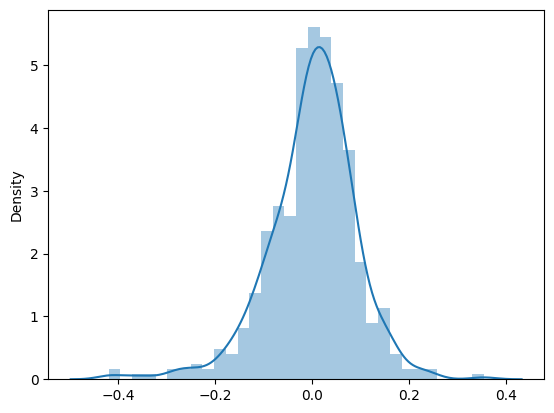

In [107]:
res = Y_train - y_train_pred
sns.distplot(res)
plt.show()

#### Observation:
The residuals follow normal distribution

### Linearity is visible between the target variable and predictor variable

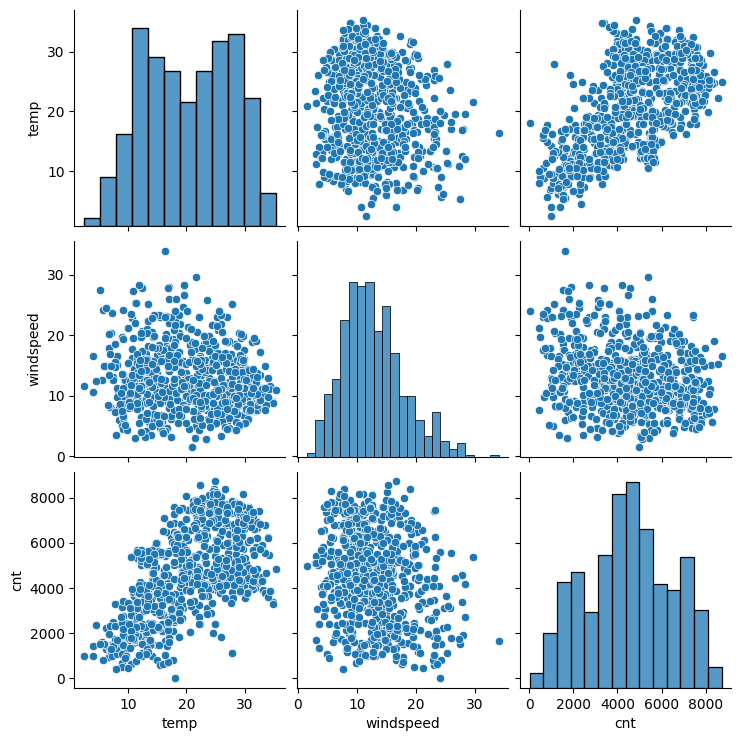

In [108]:
# create list of selected numerical variables 
selected_num_var = ['temp', 'windspeed', 'cnt']

# visualizing the relation between the numerical variables of the data set
sns.pairplot(daily_bike_demands, vars=selected_num_var)
plt.show()

### Homeodasticity

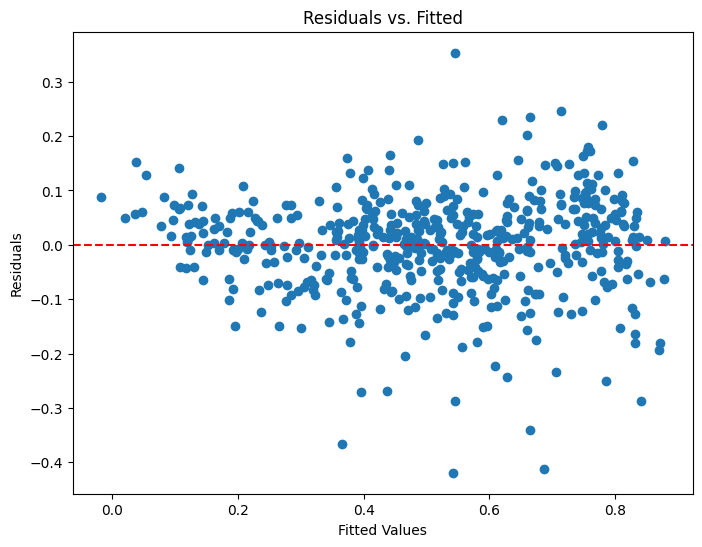

In [112]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, res)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

- There is no discernible pattern in the scatter plot hence we can conclude that the error terms are independent of each other
- The variation of data points is not increasing significantly, hence the error terms have constant variance

## Step 5: Predictions and evaluation on test set

#### Apply same pre-processing as train set
#### Rescaling train set using MinMax scaling

In [49]:
# Rescaling the data using MinMax scaling
df_test[num_var] = scaler.transform(df_test[num_var])
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,0,1,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,0,1,...,0,0,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,1,0,0,1,0,0,0,0,0,0
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0.232858,1,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
# separate the predictor variables and the target variable for test set
y_test = df_test.pop('cnt')
x_test = df_test

In [51]:
# drop the columns dropped while modeling from the test set
x_test = x_test[col]
# columns dropped while doing manual analysis
dropped_cols = ['Mon', 'workingday', 'hum', 'holiday']
x_test = x_test.drop(dropped_cols, axis=1)
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,temp,windspeed,spring,summer,winter,July,Sep,Light Snow,Mist + Cloudy,Tue
184,1.0,0,0.831783,0.084219,0,0,0,1,0,0,1,0
535,1.0,1,0.901354,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0,0,0


In [52]:
# predict y on test set
y_test_pred = lr_model.predict(x_test_sm)

In [53]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8057616301094372

### The r2 value of test value and r2 of train are within 5% of each other 
- r-squared train: 83.6%
- r-squared test: 80.6%

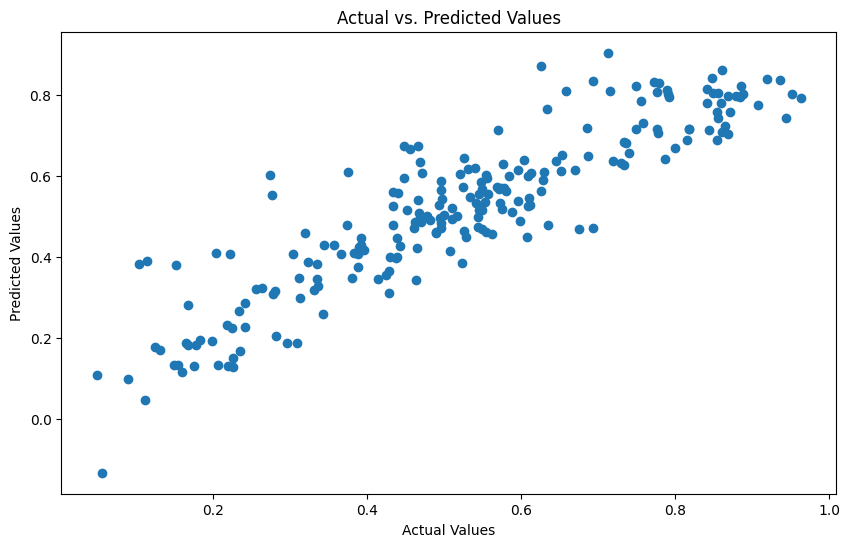

In [54]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.show()

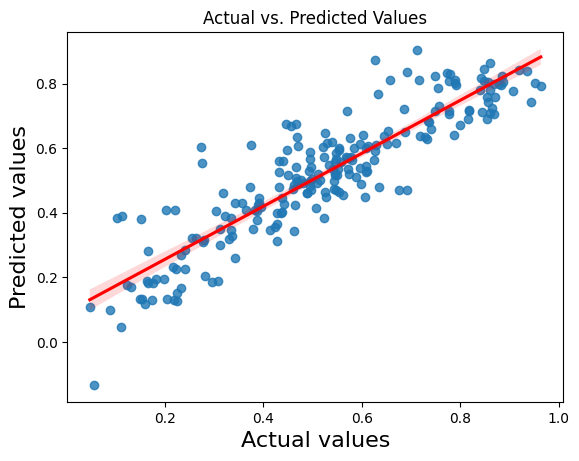

In [55]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, line_kws={"color": "red"})
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual values', fontsize=16)
plt.ylabel('Predicted values', fontsize=16)
plt.show()